In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
model_table = pd.read_csv('model_table.csv')

In [3]:
model_table['churn'].value_counts()/model_table.shape[0]

0    0.902848
1    0.097152
Name: churn, dtype: float64

In [4]:
X = model_table.iloc[:,:14]
y = model_table['churn']

In [5]:
numeric = model_table.describe().columns.tolist()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

In [7]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
X_train.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'length_contract',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power'],
      dtype='object')

In [9]:
skew_feature = ['cons_12m','cons_gas_12m','imp_cons','net_margin','pow_max']
normal_feature = ['margin_net_pow_ele']
outlier_feature = ['offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']

In [10]:
from sklearn.preprocessing import StandardScaler
for x in skew_feature:
    scaler = StandardScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [11]:
from sklearn.preprocessing import MinMaxScaler
for x in normal_feature:
    scaler =  MinMaxScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [12]:
from sklearn.preprocessing import RobustScaler
for x in outlier_feature :
    scaler =  RobustScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [13]:
features_train = X_train
features_test = X_test
label_train = y_train
label_test = y_test

In [14]:
label_train.value_counts()

0    9226
1    9226
Name: churn, dtype: int64

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr


pd.DataFrame({'accuracy_test':[accuracy_test_lr],'accuracy_train':[accuracy_train_lr],
             'precision_test':[precision_test_lr],'precision_train':[precision_train_lr],
             'recall_test':[recall_test_lr],'recall_train':[recall_train_lr],
             'f1_test':[f1_test_lr],'f1_train':[f1_train_lr],
             'auc_test':[auc_test_lr],'auc_train':[auc_train_lr]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.68188,0.617928,0.489311,0.523195,0.148736,0.645493,0.228128,0.577945,0.62101,0.664482


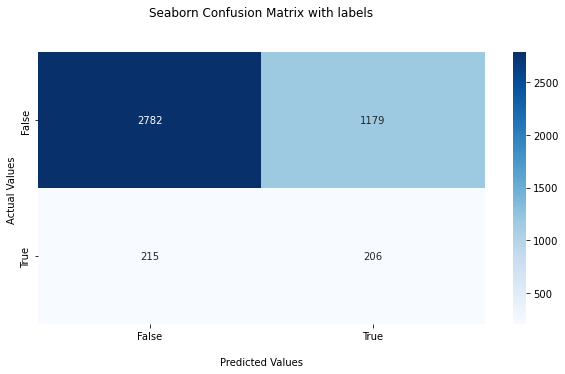

In [16]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)
auc_overfitting_dct = auc_test_dct-auc_train_dct
pd.DataFrame({'accuracy_test':[accuracy_test_dct],'accuracy_train':[accuracy_train_dct],
             'precision_test':[precision_test_dct],'precision_train':[precision_train_dct],
             'recall_test':[recall_test_dct],'recall_train':[recall_train_dct],
             'f1_test':[f1_test_dct],'f1_train':[f1_train_dct],
             'auc_test':[auc_test_dct],'auc_train':[auc_train_dct]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.820173,1.0,0.247031,1.0,0.18087,1.0,0.208835,1.0,0.564061,1.0


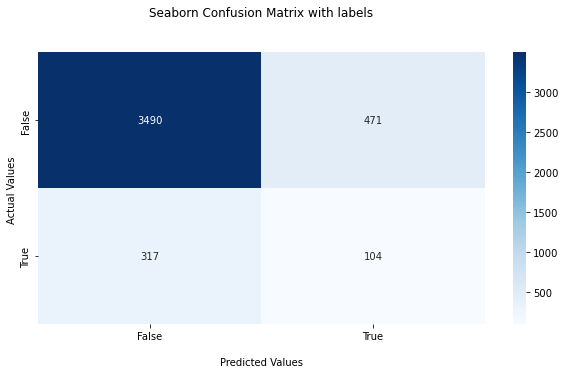

In [18]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Baiyes

In [19]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nb = accuracy_score(pred_train,label_train)
accuracy_test_nb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nb = precision_score(pred_train,label_train)
precision_test_nb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nb = recall_score(pred_train,label_train)
recall_test_nb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nb = f1_score(pred_train,label_train)
f1_test_nb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)
auc_overfitting_nb = auc_test_nb-auc_train_nb
pd.DataFrame({'accuracy_test':[accuracy_test_nb],'accuracy_train':[accuracy_train_nb],
             'precision_test':[precision_test_nb],'precision_train':[precision_train_nb],
             'recall_test':[recall_test_nb],'recall_train':[recall_train_nb],
             'f1_test':[f1_test_nb],'f1_train':[f1_train_nb],
             'auc_test':[auc_test_nb],'auc_train':[auc_train_nb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.193519,0.527639,0.938242,0.940386,0.101204,0.515141,0.182701,0.665644,0.62079,0.657906


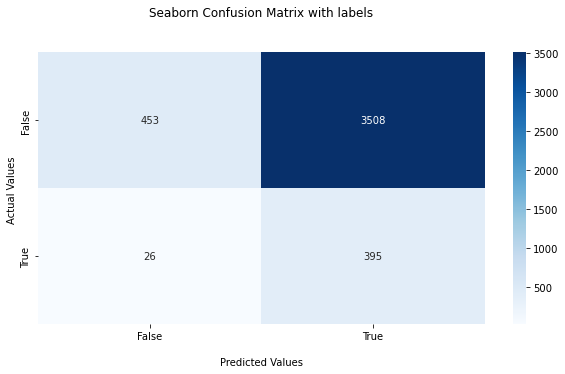

In [20]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Linear SVC

In [21]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_svc = accuracy_score(pred_train,label_train)
accuracy_test_svc = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_svc = precision_score(pred_train,label_train)
precision_test_svc = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_svc = recall_score(pred_train,label_train)
recall_test_svc = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_svc = f1_score(pred_train,label_train)
f1_test_svc = f1_score(pred_test,label_test)

from sklearn import metrics
clf_new = CalibratedClassifierCV(clf)
clf_new.fit(features_train,label_train)
pred_proba = clf_new.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf_new.predict_proba(features_train)[:,1])
auc_train_svc = metrics.auc(fpr,tpr)
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf_new.predict_proba(features_test)[:,1])
auc_test_svc = metrics.auc(fpr,tpr)
auc_overfitting_svc = auc_test_svc-auc_train_svc
pd.DataFrame({'accuracy_test':[accuracy_test_svc],'accuracy_train':[accuracy_train_svc],
             'precision_test':[precision_test_svc],'precision_train':[precision_train_svc],
             'recall_test':[recall_test_svc],'recall_train':[recall_train_svc],
             'f1_test':[f1_test_svc],'f1_train':[f1_train_svc],
             'auc_test':[auc_test_svc],'auc_train':[auc_train_svc]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.749886,0.553002,0.294537,0.315413,0.134345,0.600991,0.184524,0.413705,0.600775,0.649576


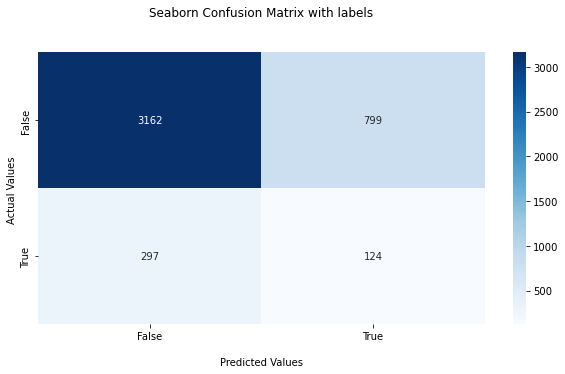

In [22]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


pd.DataFrame({'accuracy_test':[accuracy_test_rf],'accuracy_train':[accuracy_train_rf],
             'precision_test':[precision_test_rf],'precision_train':[precision_train_rf],
             'recall_test':[recall_test_rf],'recall_train':[recall_train_rf],
             'f1_test':[f1_test_rf],'f1_train':[f1_train_rf],
             'auc_test':[auc_test_rf],'auc_train':[auc_train_rf]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.895938,1.0,0.118765,1.0,0.37037,1.0,0.179856,1.0,0.662959,1.0


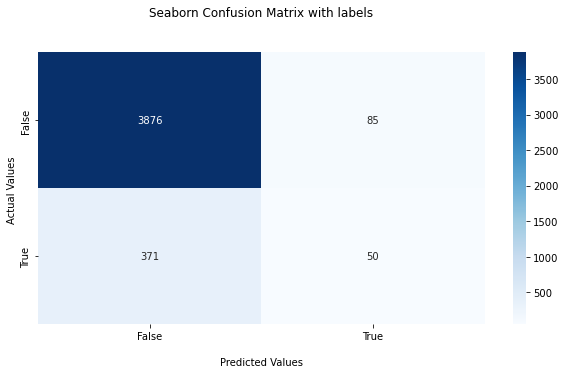

In [24]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)
auc_overfitting_gb = auc_test_gb-auc_train_gb

pd.DataFrame({'accuracy_test':[accuracy_test_gb],'accuracy_train':[accuracy_train_gb],
             'precision_test':[precision_test_gb],'precision_train':[precision_train_gb],
             'recall_test':[recall_test_gb],'recall_train':[recall_train_gb],
             'f1_test':[f1_test_gb],'f1_train':[f1_train_gb],
             'auc_test':[auc_test_gb],'auc_train':[auc_train_gb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.891146,0.903804,0.049881,0.826469,0.214286,0.977689,0.080925,0.895742,0.633037,0.95249


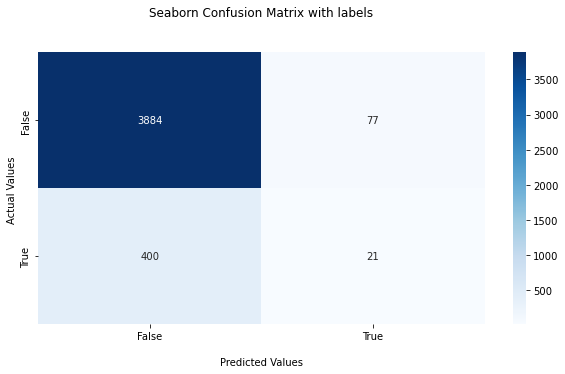

In [26]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Light GBM

In [27]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

pd.DataFrame({'accuracy_test':[accuracy_test_lgb],'accuracy_train':[accuracy_train_lgb],
             'precision_test':[precision_test_lgb],'precision_train':[precision_train_lgb],
             'recall_test':[recall_test_lgb],'recall_train':[recall_train_lgb],
             'f1_test':[f1_test_lgb],'f1_train':[f1_train_lgb],
             'auc_test':[auc_test_lgb],'auc_train':[auc_train_lgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.899589,0.949653,0.066508,0.904184,0.373333,0.994635,0.112903,0.947255,0.652456,0.986935


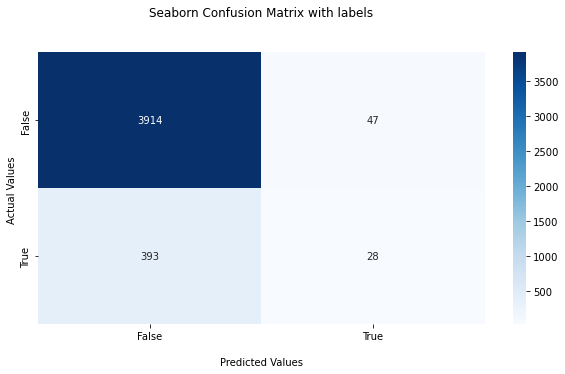

In [28]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## XGBoost

In [29]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.896166,0.972036,0.095012,0.944938,0.350877,0.999083,0.149533,0.971257,0.655316,0.996888


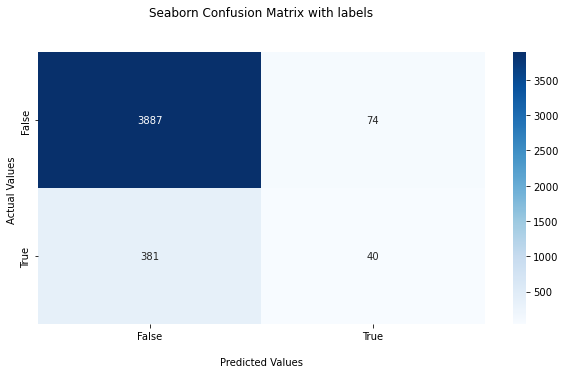

In [30]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Neural Network

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)
auc_overfitting_nn = auc_test_nn-auc_train_nn


pd.DataFrame({'accuracy_test':[accuracy_test_nn],'accuracy_train':[accuracy_train_nn],
             'precision_test':[precision_test_nn],'precision_train':[precision_train_nn],
             'recall_test':[recall_test_nn],'recall_train':[recall_train_nn],
             'f1_test':[f1_test_nn],'f1_train':[f1_train_nn],
             'auc_test':[auc_test_nn],'auc_train':[auc_train_nn]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.33455,0.581563,0.755344,0.862346,0.101565,0.552232,0.179054,0.673296,0.497196,0.587804


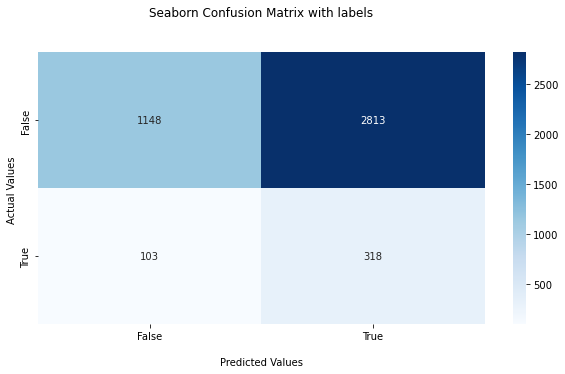

In [32]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Summary Model Performance

In [33]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Recall Test':list(np.array([recall_test_lr,recall_test_dct,recall_test_rf,recall_test_xgb,recall_test_lgb,recall_test_nn,recall_test_svc,recall_test_nb,recall_test_gb])*100),
                          'Recall Train':list(np.array([recall_train_lr,recall_train_dct,recall_train_rf,recall_train_xgb,recall_train_lgb,recall_train_nn,recall_train_svc,recall_train_nb,recall_train_gb])*100)})
kesimpulan.sort_values('Recall Test',ascending=False)

,Model,AUC Test,AUC Train,Recall Test,Recall Train
4,Light GBM,65.245616,98.693534,37.333333,99.463455
2,Random Forest,66.295940,100.000000,37.037037,100.000000
3,XGBoost,65.531569,99.688800,35.087719,99.908320
8,Gradient Boosting,63.303672,95.249013,21.428571,97.768945
1,Decision Tree,56.406076,100.000000,18.086957,100.000000
0,Linear Regression,62.101031,66.448212,14.873646,64.549345
6,Linear SVC,60.077501,64.957635,13.434453,60.099133
5,Neural Network,49.719564,58.780379,10.156500,55.223155
7,Naive Baiyes,62.079023,65.790570,10.120420,51.514072


In [34]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Precision Test':list(np.array([precision_test_lr,precision_test_dct,precision_test_rf,precision_test_xgb,precision_test_lgb,precision_test_nn,precision_test_svc,precision_test_nb,precision_test_gb])*100),
                          'Precision Train':list(np.array([precision_train_lr,precision_train_dct,precision_train_rf,precision_train_xgb,precision_train_lgb,precision_train_nn,precision_train_svc,precision_train_nb,precision_train_gb])*100)})
kesimpulan.sort_values('Precision Test',ascending=False)

,Model,AUC Test,AUC Train,Precision Test,Precision Train
7,Naive Baiyes,62.079023,65.790570,93.824228,94.038587
5,Neural Network,49.719564,58.780379,75.534442,86.234555
0,Linear Regression,62.101031,66.448212,48.931116,52.319532
6,Linear SVC,60.077501,64.957635,29.453682,31.541296
1,Decision Tree,56.406076,100.000000,24.703088,100.000000
2,Random Forest,66.295940,100.000000,11.876485,100.000000
3,XGBoost,65.531569,99.688800,9.501188,94.493822
4,Light GBM,65.245616,98.693534,6.650831,90.418383
8,Gradient Boosting,63.303672,95.249013,4.988124,82.646868


In [35]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Accuracy Test':list(np.array([accuracy_test_lr,accuracy_test_dct,accuracy_test_rf,accuracy_test_xgb,accuracy_test_lgb,accuracy_test_nn,accuracy_test_svc,accuracy_test_nb,accuracy_test_gb])*100),
                          'Accuracy Train':list(np.array([accuracy_train_lr,accuracy_train_dct,accuracy_train_rf,accuracy_train_xgb,accuracy_train_lgb,accuracy_train_nn,accuracy_train_svc,accuracy_train_nb,accuracy_train_gb])*100)})
kesimpulan.sort_values('Accuracy Test',ascending=False)

,Model,AUC Test,AUC Train,Accuracy Test,Accuracy Train
4,Light GBM,65.245616,98.693534,89.958923,94.965315
3,XGBoost,65.531569,99.688800,89.616613,97.203555
2,Random Forest,66.295940,100.000000,89.593793,100.000000
8,Gradient Boosting,63.303672,95.249013,89.114560,90.380447
1,Decision Tree,56.406076,100.000000,82.017344,100.000000
6,Linear SVC,60.077501,64.957635,74.988590,55.300238
0,Linear Regression,62.101031,66.448212,68.188042,61.792760
5,Neural Network,49.719564,58.780379,33.455043,58.156297
7,Naive Baiyes,62.079023,65.790570,19.351894,52.763928


**Data Insight**

XGBoost will be choosen because high recall and AUC. That's model can approach more churn customer than other model efficiently.

# Hyperparameter Tuning

Hyperparameter can focused to optimize the parameter and make the model more robust than base model.

Hyperparameter can focused to increase the recall to decrease the false-negatif

## Base Model

In [36]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.896166,0.972036,0.095012,0.944938,0.350877,0.999083,0.149533,0.971257,0.655316,0.996888


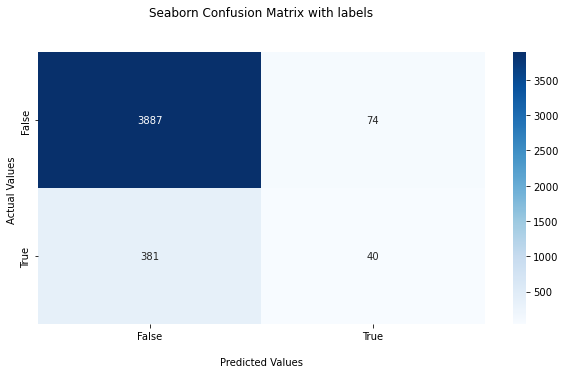

In [37]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [39]:
import xgboost as xgb
# Define grid search
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(features_train,label_train)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.9005
The best score standard deviation is 0.0037
The best hyperparameters are {'colsample_bytree': 0.8, 'reg_alpha': 1, 'reg_lambda': 0}


# Impact for Business Metrics

In [40]:
import xgboost as xgb
clf = xgb.XGBClassifier(colsample_bytree= 0.8, reg_alpha= 0.5,reg_lambda= 0.5)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.897535,0.972415,0.097387,0.946131,0.372727,0.998627,0.154426,0.97167,0.655758,0.996686


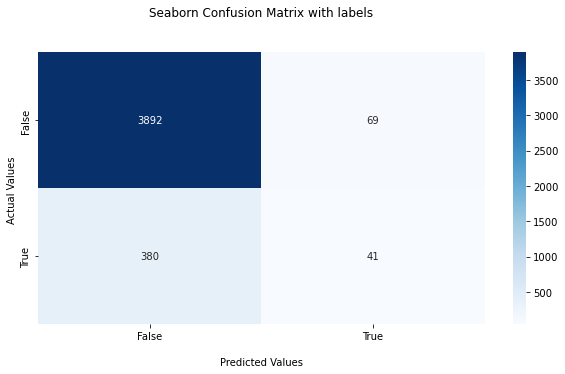

In [127]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [128]:
client = pd.read_csv('client_data.csv')

In [129]:
price = pd.read_csv('price_data.csv')

In [130]:
X = client.drop('churn',axis=1)
y = model_table['churn']

In [131]:
from sklearn.model_selection import train_test_split
X_train_business, X_test_business, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

In [132]:
X_test_business['label_test'] = label_test

In [133]:
X_test_business['label_pred'] = pred_test

In [134]:
X_test_business['pred_prob'] = pred_proba

In [135]:
X_test_business

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,label_test,label_pred,pred_prob
10992,cde7e58c25b60ee66df70b1fd26363d5,lmkebamcaaclubfxadlmueccxoimlema,2940360,155531,269980,2010-11-26,2016-11-26,2010-11-26,2015-11-27,1467.84,...,4.83,4.83,2,134.54,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0,0,0.001604
13559,1b998ba935afe9d61fa94177501efad7,MISSING,12752,0,0,2009-09-11,2016-09-03,2015-09-03,2014-09-12,1285.56,...,11.95,11.95,2,75.64,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,0.056841
13402,073b1aefdf0d99049952cab892a4f274,foosdfpfkusacimwkcsosbicdxkicaua,983659,0,192253,2012-03-15,2016-03-15,2012-03-15,2015-03-16,917.26,...,27.14,27.14,1,103.59,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,0,0,0.027869
9463,a82964ec7bcf43aab87191bbe4c91e25,MISSING,5055,2848,0,2009-12-17,2016-12-03,2015-11-01,2015-12-04,749.42,...,3.24,3.24,2,68.40,6,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,0,0.024524
12748,7b4d57c7890d389b72fda5e2bdfe7509,usilxuppasemubllopkaafesmlibmsdf,3981,0,1169,2012-12-31,2016-12-31,2012-12-31,2016-01-01,1079.39,...,0.12,0.12,1,373.07,3,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0,0.022367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,b9e126f2a62cc9708311d4eaf3ec36b8,usilxuppasemubllopkaafesmlibmsdf,44551,0,3529,2011-08-26,2016-08-26,2015-07-11,2015-08-27,191.65,...,23.64,23.64,1,22.75,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.000,0,0,0.053029
4465,f8a925b570b5094e3706add741536b39,foosdfpfkusacimwkcsosbicdxkicaua,3178,0,0,2009-08-21,2016-08-21,2015-06-17,2015-08-24,469.67,...,16.38,16.38,1,36.78,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,0.162681
5943,dd256147f4c951bb49ae906bc483dbfe,foosdfpfkusacimwkcsosbicdxkicaua,29160,0,3552,2010-08-14,2016-08-14,2010-08-14,2015-08-16,3017.46,...,12.36,12.36,1,367.32,5,lxidpiddsbxsbosboudacockeimpuepw,19.700,0,0,0.350155
6173,009c4f0e98c8dc8bd69f318724b2f1d5,foosdfpfkusacimwkcsosbicdxkicaua,17285,0,3947,2011-11-01,2016-11-01,2011-11-01,2015-11-02,2193.78,...,7.59,7.59,1,230.58,4,lxidpiddsbxsbosboudacockeimpuepw,40.000,0,0,0.011229


In [136]:
total_margin = round(X_test_business['net_margin'].sum())
discount_20 = round(X_test_business['net_margin'].sum()*0.2)
margin_churn_customer = round(X_test_business[X_test_business['label_test']==1]['net_margin'].sum())

In [137]:
discount_20_churn_customer = round(X_test_business[(X_test_business['label_pred']==1)]['net_margin'].sum()*0.2)

In [138]:
total_margin_model = round(X_test_business[(X_test_business['label_pred']==1)|(X_test_business['label_test']==0)]['net_margin'].sum())

In [139]:
model_churn_customer = X_test_business[(X_test_business['label_pred']==1)&(X_test_business['label_test']==1)]['id'].count()

In [140]:
total_churn_customer = X_test_business[(X_test_business['label_test']==1)]['id'].count()

In [141]:
print('Total net margin per year $',total_margin)

Total net margin per year $ 825839


In [142]:
print('Total net margin + 20% discount $',total_margin - discount_20)

Total net margin + 20% discount $ 660671


In [143]:
print('total 20% discount without model $',discount_20)

total 20% discount without model $ 165168


In [144]:
print('Potential revenue by lost churn customer $',margin_churn_customer)

Potential revenue by lost churn customer $ 86827


In [145]:
print('total 20% discount with model $',discount_20_churn_customer)

total 20% discount with model $ 6443


In [146]:
print('predicted margin without model $',total_margin - margin_churn_customer)

predicted margin without model $ 739012


In [147]:
print('predicted margin with model $',total_margin_model - discount_20_churn_customer)

predicted margin with model $ 742176


In [148]:
print('predicted churn customer with model',model_churn_customer)

predicted churn customer with model 41


In [149]:
print('predicted customer acquistion cost $',discount_20/margin_churn_customer)

predicted customer acquistion cost $ 1.9022654243495687


In [150]:
print('total churn customer with model',total_churn_customer)

total churn customer with model 421


**Data Insight**

steeped discount must applied to reduce margin lost. Deciling score can be consideration to steeped discount.

## Deciling the score

In [64]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [65]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [66]:
scores_train = scoring(features_train,clf,label_train)

In [67]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.000000,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.000000,1846,1846,0,100.000000,1846,0,20.008671,0.000000,20.008671
2.000000,1845,1845,0,100.000000,3691,0,40.006503,0.000000,40.006503
3.000000,1845,1845,0,100.000000,5536,0,60.004336,0.000000,60.004336
4.000000,1845,1845,0,100.000000,7381,0,80.002168,0.000000,80.002168
5.000000,1845,1642,203,88.997290,9023,203,97.799697,2.200303,95.599393
6.000000,1845,161,1684,8.726287,9184,1887,99.544765,20.453067,79.091697
7.000000,1845,26,1819,1.409214,9210,3706,99.826577,40.169087,59.657490
8.000000,1845,10,1835,0.542005,9220,5541,99.934966,60.058530,39.876436


In [68]:
scores_train.to_excel('score-train.xlsx',index=False)

In [69]:
table_score = scores_train.groupby('DECILE').agg({'SCORE':['min','max']}).reset_index()

In [70]:
table_score.columns = ['DECILE','min','max']

In [71]:
table_score

,DECILE,min,max
0,1.0,0.999734,0.999994
1,2.0,0.998613,0.999734
2,3.0,0.993146,0.998611
3,4.0,0.947868,0.993138
4,5.0,0.267647,0.947868
5,6.0,0.109586,0.267604
6,7.0,0.066569,0.109556
7,8.0,0.041096,0.066549
8,9.0,0.021737,0.041095
9,10.0,0.000111,0.021717


**Data Insight**

DECILE with higher than 6 have litle probability to churn <1%. We can applied discount start from DECILE 5.

categorize DECILE :

    0-1 : Lost Customer
    2-3 : Risk to Lost
    4-5 : General Customer
    6-9 : Loyal Customer

In [72]:
bins = sorted(np.array(table_score['max']))

In [73]:
array= np.array(X_test_business['pred_prob'])

In [74]:
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)

In [75]:
X_test_business['DECILE'] = bin_indices

In [76]:
discount_10 = round(X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=4)]['net_margin'].sum()*0.1)

In [77]:
discount_20 = round(X_test_business[(X_test_business['DECILE']<=3)&(X_test_business['DECILE']>=2)]['net_margin'].sum()*0.2)

In [78]:
total_discount = discount_10 + discount_20

In [79]:
total_margin_model = round(X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=2)|(X_test_business['label_test']==0)]['net_margin'].sum())

In [80]:
model_churn_customer = X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=2)&(X_test_business['label_test']==1)]['id'].count()

In [81]:
print('predicted margin with model $',total_margin_model - total_discount)

predicted margin with model $ 733296


In [126]:
print('predicted customer acquisition cost $',total_discount/model_churn_customer)

predicted customer acquisition cost $ 238.17994100294985


In [82]:
print('predicted churn customer with model',model_churn_customer)

predicted churn customer with model 339


<AxesSubplot:xlabel='DECILE', ylabel='id'>

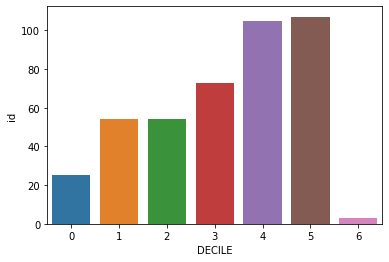

In [83]:
customer_churn = X_test_business[X_test_business['label_test']==1]
customer_churn = customer_churn.groupby('DECILE')['id'].count().reset_index()
sns.barplot(x='DECILE',y='id',data=customer_churn)

**Data Insight**

We can choose deceiling scoring to reach more churn customer but we lost much in revenue because not all customer is profitable.

## Feature Importance

In [84]:
import xgboost as xgb
clf = xgb.XGBClassifier(colsample_bytree= 0.8, reg_alpha= 0.5,reg_lambda= 0.5)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.897535,0.972415,0.097387,0.946131,0.372727,0.998627,0.154426,0.97167,0.655758,0.996686


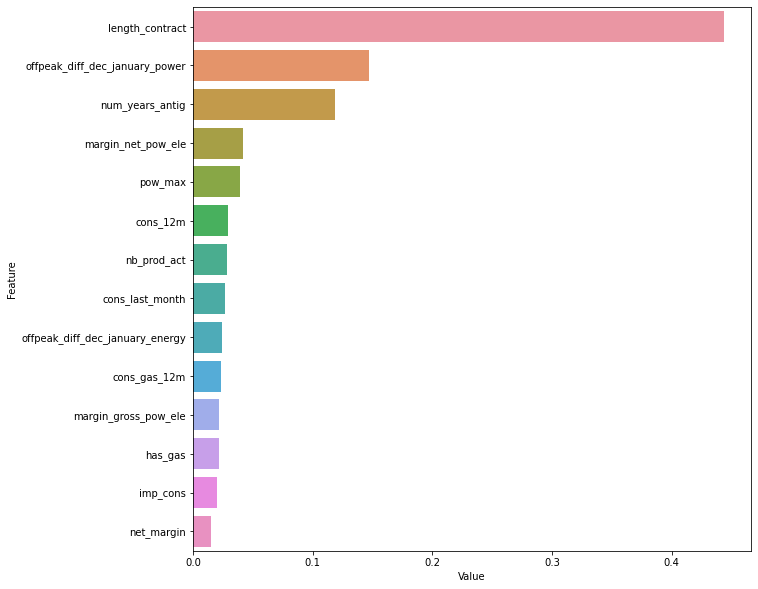

In [85]:
X_train_col = X_train
X_test_col = X_test
features_important = pd.DataFrame({'Feature':X_train_col.columns.tolist(),
                          'Value':list(clf.feature_importances_)})
features_important = features_important.sort_values('Value',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x='Value',y='Feature',data=features_important)
plt.show()

In [86]:
column_important = features_important['Feature'].tolist()

### Length of Contract

In [87]:
model_table['id'] = client['id']

In [88]:
length_contract = model_table.groupby(['length_contract','churn'])['id'].count().reset_index()

<AxesSubplot:xlabel='length_contract', ylabel='id'>

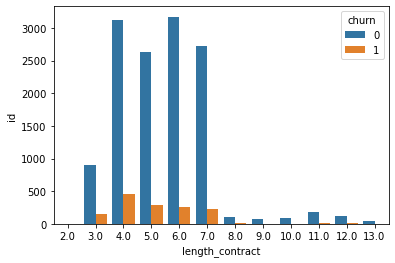

In [89]:
sns.barplot(x='length_contract',y='id',hue='churn',data=length_contract)

**Data Insight**

length contract 3-7 years have higher churn customer

<AxesSubplot:xlabel='length_contract', ylabel='%churn'>

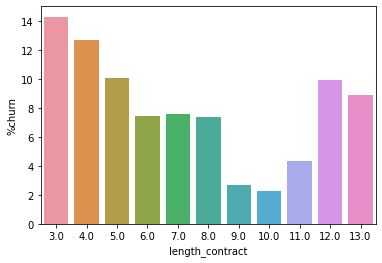

In [90]:
length_contract = model_table[model_table['churn']==1]
total_churn = model_table.groupby(['length_contract'])['id'].count().reset_index()
total_churn.columns = ['length_contract','total']
length_contract = length_contract.groupby(['length_contract'])['id'].count().reset_index()
length_contract = length_contract.merge(total_churn,how='left',on='length_contract')
length_contract['%churn'] = (length_contract['id']/length_contract['total'])*100
sns.barplot(x='length_contract',y='%churn',data=length_contract)

**Data Insight**

length contract 3 years most high churn rate

### offpeak_diff_dec_jan_power

In [91]:
model_table['offpeak_diff_dec_january_power'].describe()

count    14606.000000
mean         0.278495
std          1.349231
min        -44.266931
25%          0.000004
50%          0.162916
75%          0.177779
max         40.728885
Name: offpeak_diff_dec_january_power, dtype: float64

**Data Insight**

75% customer have diffirent offpeak dec-jan power less 1 and more -1

In [92]:
offpeak_total = model_table.groupby('offpeak_diff_dec_january_power')['id'].count().reset_index()
offpeak_total.columns = ['offpeak_diff_dec_january_power','total']

In [93]:
offpeak_churn = model_table[model_table['churn']==1]
offpeak_churn = offpeak_churn.groupby('offpeak_diff_dec_january_power')['id'].count().reset_index()
offpeak_churn = offpeak_churn.merge(offpeak_total,how='left',on='offpeak_diff_dec_january_power')
offpeak_churn['%churn'] = (offpeak_churn['id']/offpeak_churn['total'])*100
offpeak_churn.sort_values('id',ascending=False)[:10]

,offpeak_diff_dec_january_power,id,total,%churn
17,0.177779,429,5221,8.216817
15,0.162916,352,3381,10.411121
11,0.000000,157,1462,10.738714
9,-0.000001,149,1761,8.461102
12,0.000004,89,677,13.146233
38,2.177779,43,359,11.977716
35,1.677779,36,357,10.084034
28,0.662916,22,160,13.750000
21,0.236694,18,68,26.470588
32,1.177778,15,217,6.912442


In [94]:
offpeak_churn.sort_values('%churn',ascending=False)[:10]

,offpeak_diff_dec_january_power,id,total,%churn
2,-14.669844,1,1,100.000000
47,9.177780,1,1,100.000000
45,4.466522,1,1,100.000000
44,3.893604,1,1,100.000000
40,2.837631,1,1,100.000000
42,3.715825,2,3,66.666667
6,-0.497997,2,3,66.666667
1,-14.762221,1,2,50.000000
24,0.468123,1,2,50.000000
39,2.177780,1,2,50.000000


In [95]:
import shap
explainer = shap.Explainer(clf)
shap_values = explainer(features_train)

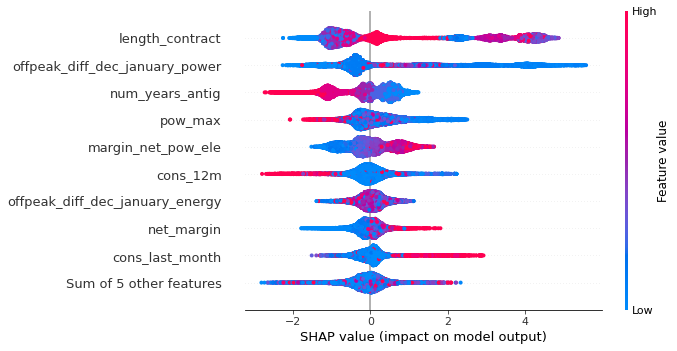

In [154]:
shap.plots.beeswarm(shap_values)

**Data Insight**

higher different offpeak price can higher churn rate

### num_years_antig

In [97]:
model_table['num_years_antig'].describe()

count    14606.000000
mean         4.997809
std          1.611749
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         13.000000
Name: num_years_antig, dtype: float64

**Data Insight**

50% customer have less 4 years membership

<AxesSubplot:xlabel='num_years_antig', ylabel='id'>

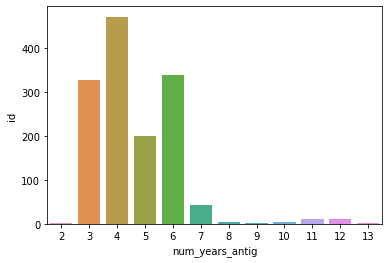

In [98]:
churn_customer = model_table[model_table['churn']==1]
churn_customer = churn_customer.groupby(['num_years_antig'])['id'].count().reset_index()
sns.barplot(x='num_years_antig',y='id',data=churn_customer)

In [99]:
total_customer = model_table.groupby(['num_years_antig'])['id'].count().reset_index()
total_customer.columns = ['num_years_antig','total']

In [100]:
churn_customer = churn_customer.merge(total_customer,how='left',on='num_years_antig')

<AxesSubplot:xlabel='num_years_antig', ylabel='%churn'>

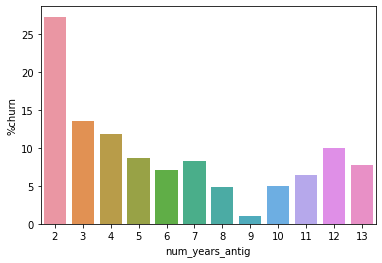

In [101]:
churn_customer['%churn'] = (churn_customer['id']/churn_customer['total'])*100
sns.barplot(x='num_years_antig',y='%churn',data = churn_customer)

**Data Insight**

younger membership customer tend to be churn

### Pow Max

In [102]:
model_table['pow_max'].describe()

count    14606.000000
mean        18.135136
std         13.534743
min          3.300000
25%         12.500000
50%         13.856000
75%         19.172500
max        320.000000
Name: pow_max, dtype: float64

<AxesSubplot:xlabel='pow_max', ylabel='Density'>

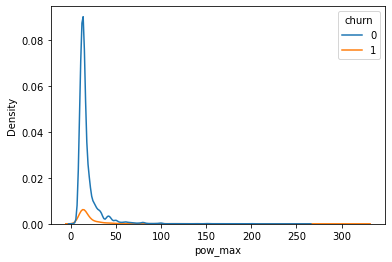

In [106]:
sns.kdeplot(model_table['pow_max'],hue=model_table['churn'])

In [123]:
pow_max = model_table[model_table['pow_max']<19]

In [124]:
pow_max_total = pow_max.groupby('pow_max')['id'].count().reset_index()
pow_max_total.columns = ['pow_max','total']
pow_max_churn = pow_max[pow_max['churn']==1]
pow_max_churn = pow_max_churn.groupby('pow_max')['id'].count().reset_index()
pow_max_churn = pow_max_churn.merge(pow_max_total,how='left',on='pow_max')
pow_max_churn['%churn'] = (pow_max_churn['id']/pow_max_churn['total'])*100
pow_max_churn.sort_values('id',ascending=False)[:10]

,pow_max,id,total,%churn
25,13.200,168,2124,7.909605
6,10.392,167,2000,8.350000
30,13.856,141,1504,9.375000
39,15.000,47,583,8.061750
60,16.500,39,405,9.629630
4,10.350,35,480,7.291667
5,10.390,34,224,15.178571
69,17.321,33,233,14.163090
23,13.150,31,234,13.247863
21,12.500,26,269,9.665428


<AxesSubplot:xlabel='pow_max', ylabel='%churn'>

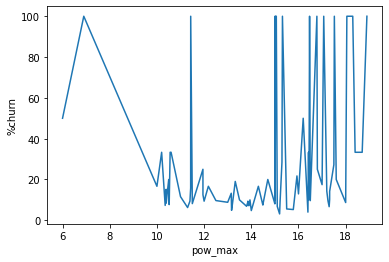

In [125]:
sns.lineplot(x='pow_max',y='%churn',data=pow_max_churn)

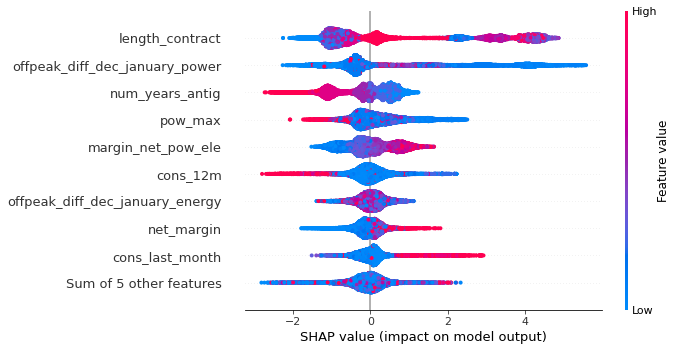

In [155]:
shap.plots.beeswarm(shap_values)

**Data Insight**

Lower power_max much churn consumer

# Business Impact of Discount

We analyzed impact of recommendation discount of 20% from SME division. Our task is to calculate the forecast revenue for the set of customers :

    1. When no discount offered
    2. when discount offered who customer should receive the discount

## Baseline revenue

calculate forecast revenue based on forecast consumption and forecast price. we calculate forecast revenue after churn with 91.9% chance of customer churn

In [163]:
X_test_business['baseline_revenue'] = X_test_business['forecast_cons_12m']*X_test_business['forecast_price_energy_off_peak']+X_test_business['forecast_meter_rent_12m']
X_test_business['baseline_revenue']

10992    243.922716
13559    223.121771
13402    189.656204
9463     123.420547
12748    314.182923
            ...    
6495     153.783665
4465      85.267307
5943     483.791249
6173     255.595114
10307     66.895355
Name: baseline_revenue, Length: 4382, dtype: float64

In [166]:
X_test_business['baseline_revenue_after_churn'] = X_test_business['baseline_revenue']*(1-0.919*X_test_business['label_test'])
X_test_business['baseline_revenue_after_churn']

10992    243.922716
13559    223.121771
13402    189.656204
9463     123.420547
12748    314.182923
            ...    
6495     153.783665
4465      85.267307
5943     483.791249
6173     255.595114
10307     66.895355
Name: baseline_revenue_after_churn, Length: 4382, dtype: float64

## Calculate the estimated benefit and cost

In [168]:
X_test_business

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,label_test,label_pred,pred_prob,baseline_revenue,baseline_revenue_after_churn
10992,cde7e58c25b60ee66df70b1fd26363d5,lmkebamcaaclubfxadlmueccxoimlema,2940360,155531,269980,2010-11-26,2016-11-26,2010-11-26,2015-11-27,1467.84,...,2,134.54,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0,0,0.001604,243.922716,243.922716
13559,1b998ba935afe9d61fa94177501efad7,MISSING,12752,0,0,2009-09-11,2016-09-03,2015-09-03,2014-09-12,1285.56,...,2,75.64,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,0.056841,223.121771,223.121771
13402,073b1aefdf0d99049952cab892a4f274,foosdfpfkusacimwkcsosbicdxkicaua,983659,0,192253,2012-03-15,2016-03-15,2012-03-15,2015-03-16,917.26,...,1,103.59,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,0,0,0.027869,189.656204,189.656204
9463,a82964ec7bcf43aab87191bbe4c91e25,MISSING,5055,2848,0,2009-12-17,2016-12-03,2015-11-01,2015-12-04,749.42,...,2,68.40,6,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,0,0.024524,123.420547,123.420547
12748,7b4d57c7890d389b72fda5e2bdfe7509,usilxuppasemubllopkaafesmlibmsdf,3981,0,1169,2012-12-31,2016-12-31,2012-12-31,2016-01-01,1079.39,...,1,373.07,3,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0,0.022367,314.182923,314.182923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,b9e126f2a62cc9708311d4eaf3ec36b8,usilxuppasemubllopkaafesmlibmsdf,44551,0,3529,2011-08-26,2016-08-26,2015-07-11,2015-08-27,191.65,...,1,22.75,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.000,0,0,0.053029,153.783665,153.783665
4465,f8a925b570b5094e3706add741536b39,foosdfpfkusacimwkcsosbicdxkicaua,3178,0,0,2009-08-21,2016-08-21,2015-06-17,2015-08-24,469.67,...,1,36.78,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,0.162681,85.267307,85.267307
5943,dd256147f4c951bb49ae906bc483dbfe,foosdfpfkusacimwkcsosbicdxkicaua,29160,0,3552,2010-08-14,2016-08-14,2010-08-14,2015-08-16,3017.46,...,1,367.32,5,lxidpiddsbxsbosboudacockeimpuepw,19.700,0,0,0.350155,483.791249,483.791249
6173,009c4f0e98c8dc8bd69f318724b2f1d5,foosdfpfkusacimwkcsosbicdxkicaua,17285,0,3947,2011-11-01,2016-11-01,2011-11-01,2015-11-02,2193.78,...,1,230.58,4,lxidpiddsbxsbosboudacockeimpuepw,40.000,0,0,0.011229,255.595114,255.595114


pick cut-off probability of churn rate (>50%) :
- customer with high churn rate will offered discount
- customer below probability churn rate don't get discount

assumption :
- customer who are offered a discount accept it
- customer don't received the discount don't churn

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [174]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['baseline_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['pred_prob'] >= cutoff, 'discount_revenue'] = pred['baseline_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['baseline_revenue_after_churn']
    return pred['revenue_delta'].sum()

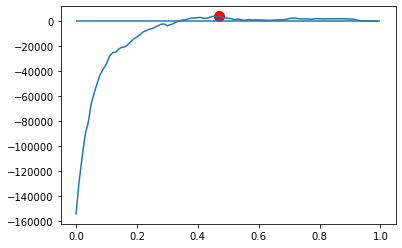

Maximum benefit at cutoff 0.47000000000000003 with revenue delta of $4,103.39


In [175]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(X_test_business, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## How to select prioritize customer

 we determine the threshold the revenue the customer

In [178]:
X_test_business['baseline_revenue'].describe()

count    4382.000000
mean      312.418446
std       301.517569
min         0.000000
25%       116.915153
50%       222.236316
75%       411.896702
max      4613.591603
Name: baseline_revenue, dtype: float64

we will choose `$400` as threshold revenue because `25%`customer have `$411` 

<AxesSubplot:xlabel='baseline_revenue', ylabel='Density'>

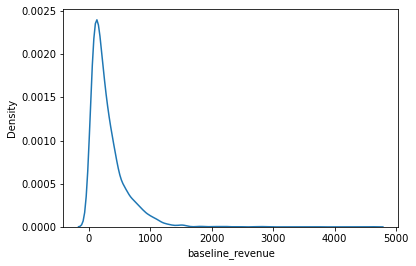

In [177]:
sns.kdeplot(X_test_business['baseline_revenue'])

In [186]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=400):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['baseline_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['pred_prob'] >= cutoff) & (pred['baseline_revenue'] > min_rev),
    'discount_revenue'] = pred['baseline_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['baseline_revenue_after_churn']
    return pred['revenue_delta'].sum()

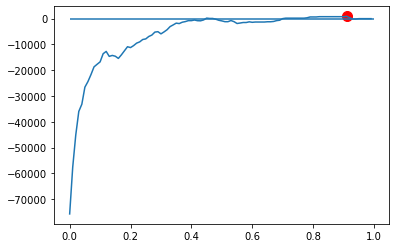

Maximum benefit at cutoff 0.91 with revenue delta of $934.07


In [187]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(X_test_business, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

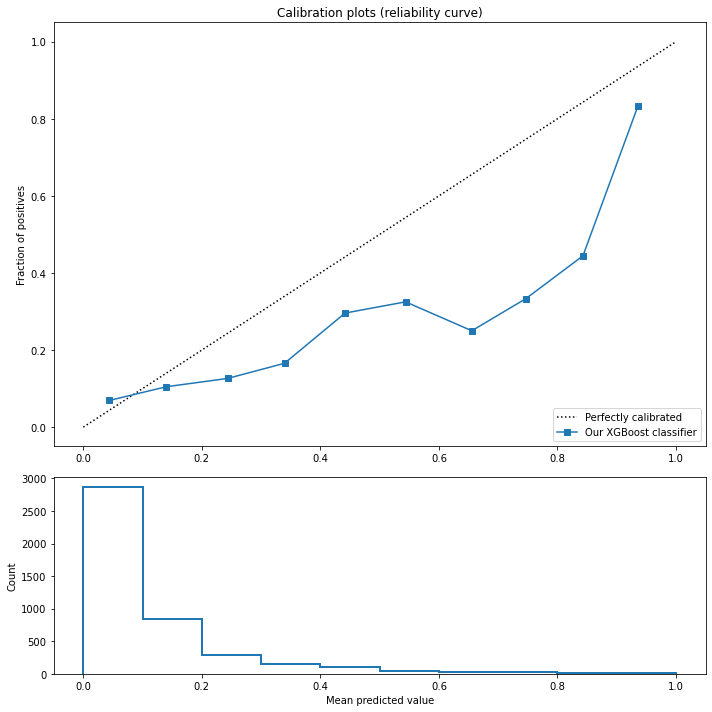

In [188]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=X_test_business['label_test'],
    y_prob=X_test_business['pred_prob'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our XGBoost classifier")
ax2.hist(X_test_business['pred_prob'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

In [191]:
X_test_business['baseline_revenue'] = X_test_business['forecast_cons_12m']*X_test_business['forecast_price_energy_off_peak']+X_test_business['forecast_meter_rent_12m']
X_test_business['baseline_revenue_after_churn'] = X_test_business['baseline_revenue']*(1-0.919*X_test_business['pred_prob'])

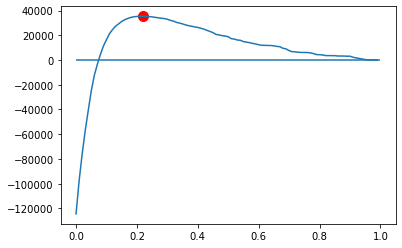

Maximum benefit at cutoff 0.22 with revenue delta of $35,374.56


In [192]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(X_test_business, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)